## Bibliotecas


In [50]:
!pip install statsmodels

In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

## Inicio

In [52]:
vendas_shampoo = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv")

In [53]:
vendas_shampoo.head(5)

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [54]:
vendas_shampoo.shape

(36, 2)

In [55]:
vendas_shampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      36 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [56]:
vendas_shampoo['Month'].dtype

dtype('O')

In [57]:
vendas_shampoo.index

RangeIndex(start=0, stop=36, step=1)

In [58]:
meses = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

In [59]:
def converter_mes_ano(mes_ano):
    parte_mes, parte_ano = mes_ano.split('-')
    mes = meses[parte_ano]
    ano = '202' + parte_mes
    return datetime.strptime(f'{ano}-{mes}-01', '%Y-%m-%d')

In [60]:
vendas_shampoo['data'] = vendas_shampoo['Month'].apply(converter_mes_ano)

In [39]:
vendas_shampoo['data'] = pd.to_datetime(vendas_shampoo['data'])

In [40]:
vendas_shampoo.head(10)

,Month,Sales of shampoo over a three year period,data
0,1-Jan,266.0,2021-01-01
1,1-Feb,145.9,2021-02-01
2,1-Mar,183.1,2021-03-01
3,1-Apr,119.3,2021-04-01
4,1-May,180.3,2021-05-01
5,1-Jun,168.5,2021-06-01
6,1-Jul,231.8,2021-07-01
7,1-Aug,224.5,2021-08-01
8,1-Sep,192.8,2021-09-01
9,1-Oct,122.9,2021-10-01


In [66]:
vendas_shampoo = vendas_shampoo.drop('Month', axis=1)


In [67]:
vendas_shampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sales of shampoo over a three year period  36 non-null     float64       
 1   data                                       36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [77]:
meses_duplicados = vendas_shampoo['data'].duplicated().sum()
meses_nulos = vendas_shampoo['data'].isnull().sum()
sort_data = vendas_shampoo['data'].sort_values()
gap = sort_data.diff().max() - sort_data.diff().min()
print('Meses Duplicados = ', meses_duplicados)
print('Meses nulos = ', meses_nulos)
print('gap = ', gap)


Meses Duplicados =  0
Meses nulos =  0
gap =  3 days 00:00:00


In [70]:
vendas_shampoo.head(5)

,Sales of shampoo over a three year period,data
0,266.0,2021-01-01
1,145.9,2021-02-01
2,183.1,2021-03-01
3,119.3,2021-04-01
4,180.3,2021-05-01


In [71]:
vendas_shampoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sales of shampoo over a three year period  36 non-null     float64       
 1   data                                       36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [72]:
vendas_shampoo.sort_values('data', inplace = True)

In [87]:
vendas_shampoo['diff'] = vendas_shampoo['data'].diff()
vendas_shampoo.head(5)

,valores,data,diff
0,266.0,2021-01-01,NaT
1,145.9,2021-02-01,31 days
2,183.1,2021-03-01,28 days
3,119.3,2021-04-01,31 days
4,180.3,2021-05-01,30 days


In [85]:
vendas_shampoo.isna().sum()

Sales of shampoo over a three year period    0
data                                         0
diff                                         1
dtype: int64

In [86]:
vendas_shampoo = vendas_shampoo.rename(columns={
    'Sales of shampoo over a three year period': 'valores'
})

In [91]:
resultados = seasonal_decompose(vendas_shampoo['valores'], model='additive', period=12)

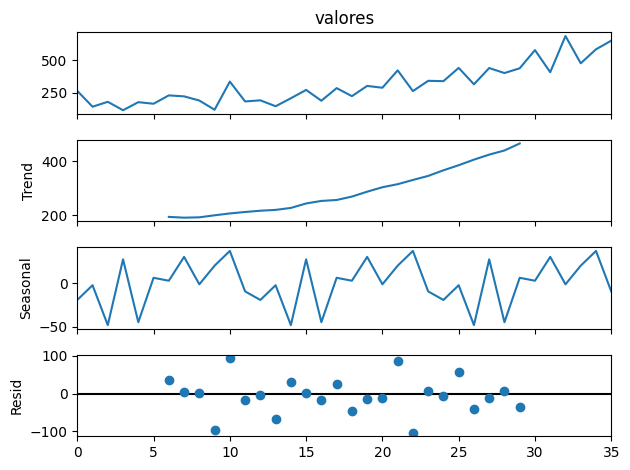

In [89]:
#seasonal decompose
resultados.plot()
plt.tight_layout()
plt.show()

## Resolução


In [94]:
#dados para treinamento = 29
train_data.index

RangeIndex(start=0, stop=29, step=1)

In [95]:
#dados para teste (36 - 29 = 7)
test_data.index

RangeIndex(start=29, stop=36, step=1)

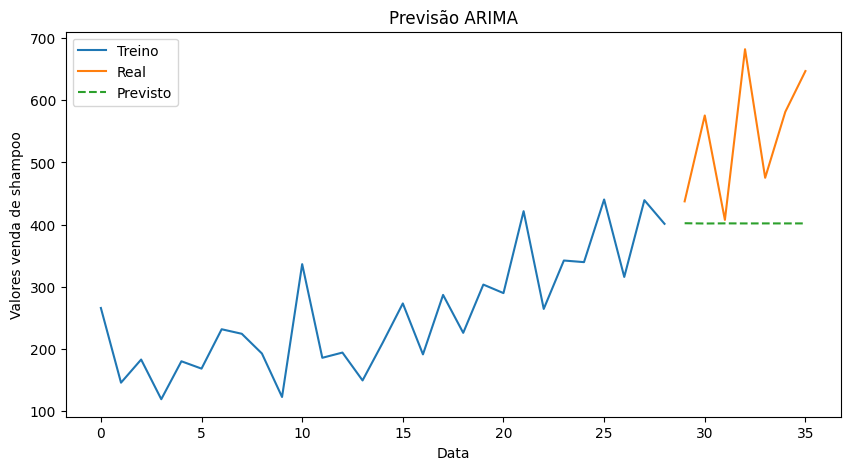

In [122]:
train_data = vendas_shampoo.iloc[:-7]
test_data = vendas_shampoo.iloc[-7:]

model = ARIMA(train_data['valores'], order=(1, 1, 1))
fitted_model = model.fit()

predictions = fitted_model.forecast(steps=7)

plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['valores'], label='Treino')
plt.plot(test_data.index, test_data['valores'], label='Real')
plt.plot(test_data.index, predictions, label='Previsto', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Valores venda de shampoo')
plt.title('Previsão ARIMA')
plt.legend()
plt.show()

In [117]:
train_data.shape

(29, 3)

In [116]:
test_data.shape

(7, 3)

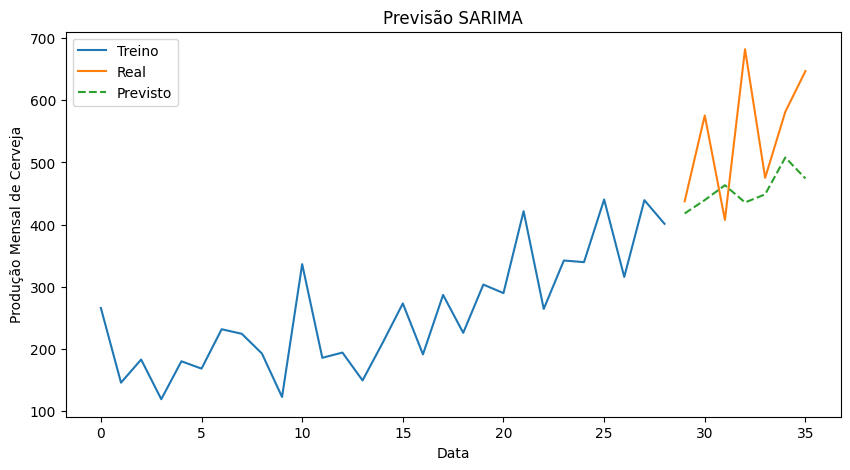

In [120]:
data = vendas_shampoo['valores'].values

train_size = len(vendas_shampoo) - 7
train_data, test_data = data[:train_size], data[train_size:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(10, 5))
plt.plot(vendas_shampoo.index[:train_size], train_data, label='Treino')
plt.plot(vendas_shampoo.index[train_size:], test_data, label='Real')
plt.plot(vendas_shampoo.index[train_size:], forecast, label='Previsto', linestyle='--')
plt.xlabel("Data")
plt.ylabel("Valores venda de shampoo")
plt.title("Previsão SARIMA")
plt.legend()

plt.show()